TEAM 18

Abhijit Sethi        - PES1UG19CS012

Abhijnya Bhat        - PES1UG19CS015

Sammith S Bharadwaj  - PES1UG19CS427

Shamanth K M         - PES1UG19CS444

# Pre-Processing

### Importing modules

In [ ]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

### Loading dataset

In [ ]:
#Loading the dataset in Graph stype
season3 = pd.read_csv('got-s3-edges.csv')
# season3 = pd.read_csv('got-s3-edges.csv')

### Converting CSV file into networkX graph

In [ ]:
G = nx.Graph()

In [ ]:
# Iterating through the DataFrame to add edges
for _, edge in season3.iterrows():
    G.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


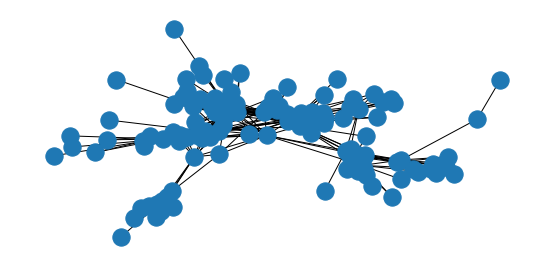

In [ ]:
nx.draw(G)

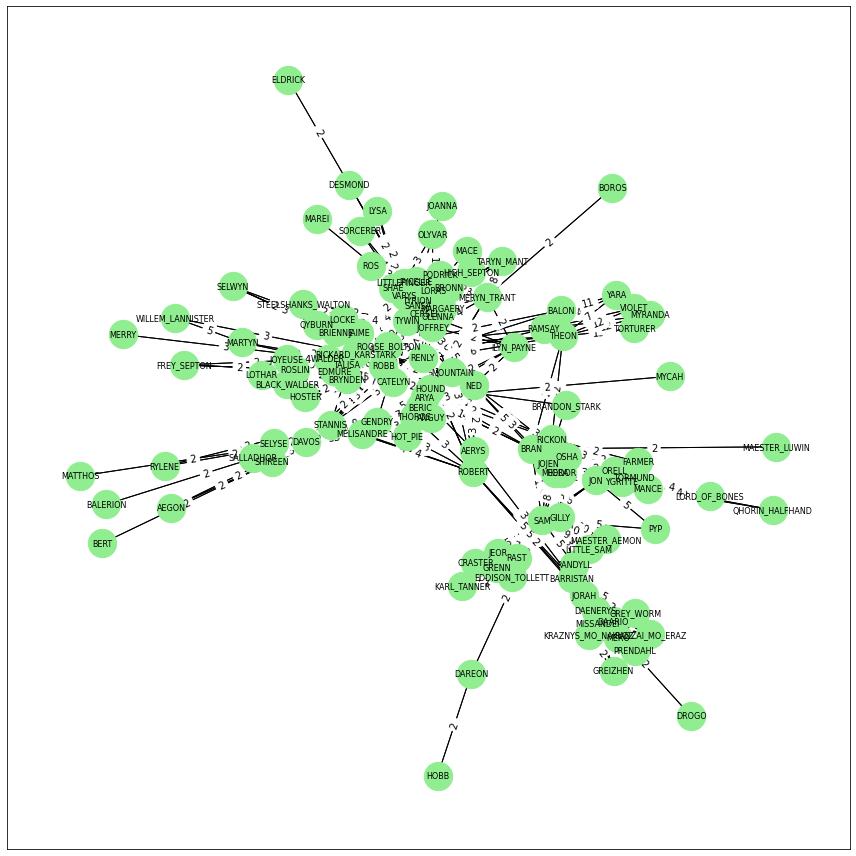

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

# EDA

### Centrality

In [ ]:
degc = nx.degree_centrality(G)

In [ ]:
degc

{'AEGON': 0.016260162601626018,
 'AERYS': 0.04065040650406505,
 'ANGUY': 0.05691056910569106,
 'ARYA': 0.13008130081300814,
 'BALERION': 0.008130081300813009,
 'BALON': 0.04065040650406505,
 'BARRISTAN': 0.07317073170731708,
 'BERIC': 0.06504065040650407,
 'BERT': 0.008130081300813009,
 'BLACK_WALDER': 0.04878048780487805,
 'BOROS': 0.008130081300813009,
 'BRAN': 0.13821138211382114,
 'BRANDON_STARK': 0.016260162601626018,
 'BRIENNE': 0.04065040650406505,
 'BRONN': 0.11382113821138212,
 'BRYNDEN': 0.0894308943089431,
 'CATELYN': 0.1788617886178862,
 'CERSEI': 0.1626016260162602,
 'CRASTER': 0.05691056910569106,
 'DAARIO': 0.05691056910569106,
 'DAENERYS': 0.0975609756097561,
 'DAREON': 0.016260162601626018,
 'DAVOS': 0.0813008130081301,
 'DESMOND': 0.024390243902439025,
 'DROGO': 0.008130081300813009,
 'EDDISON_TOLLETT': 0.04878048780487805,
 'EDMURE': 0.12195121951219513,
 'ELDRICK': 0.008130081300813009,
 'FARMER': 0.0813008130081301,
 'FREY_SEPTON': 0.024390243902439025,
 'GENDRY': 

In [ ]:
import operator
sorted_x = sorted(degc.items(), key=operator.itemgetter(1))

In [ ]:
sorted_x

[('TORTURER', 0.008130081300813009),
 ('MAREI', 0.008130081300813009),
 ('JOANNA', 0.008130081300813009),
 ('MERRY', 0.008130081300813009),
 ('MYCAH', 0.008130081300813009),
 ('BALERION', 0.008130081300813009),
 ('BERT', 0.008130081300813009),
 ('BOROS', 0.008130081300813009),
 ('MAESTER_LUWIN', 0.008130081300813009),
 ('DROGO', 0.008130081300813009),
 ('HOBB', 0.008130081300813009),
 ('MATTHOS', 0.008130081300813009),
 ('ELDRICK', 0.008130081300813009),
 ('SALLADHOR', 0.016260162601626018),
 ('OLYVAR', 0.016260162601626018),
 ('MAESTER_AEMON', 0.016260162601626018),
 ('LITTLE_SAM', 0.016260162601626018),
 ('PYP', 0.016260162601626018),
 ('WILLEM_LANNISTER', 0.016260162601626018),
 ('RANDYLL', 0.016260162601626018),
 ('SORCERER', 0.016260162601626018),
 ('BRANDON_STARK', 0.016260162601626018),
 ('AEGON', 0.016260162601626018),
 ('DAREON', 0.016260162601626018),
 ('RYLENE', 0.016260162601626018),
 ('QHORIN_HALFHAND', 0.016260162601626018),
 ('LYSA', 0.016260162601626018),
 ('MYRANDA', 0

In [ ]:
nx.selfloop_edges(G)

<generator object selfloop_edges.<locals>.<genexpr> at 0x7fd3d69f7d50>

### Betweenness Centrality for all characters

In [ ]:

bet = nx.betweenness_centrality(G)
sorted(bet.items(), key=operator.itemgetter(1), reverse=True)

[('ROBB', 0.2381163571332072),
 ('NED', 0.17455490693263),
 ('ROBERT', 0.1612072816209624),
 ('BRAN', 0.14802295374376237),
 ('JON', 0.13598714263346537),
 ('TYWIN', 0.12858396569237646),
 ('CATELYN', 0.12351544108875671),
 ('SAM', 0.10217883119508575),
 ('TYRION', 0.09865173199290381),
 ('STANNIS', 0.07693211332651917),
 ('DAVOS', 0.06436231041974806),
 ('DAENERYS', 0.060330053624445844),
 ('THEON', 0.05132951410087927),
 ('ARYA', 0.045507869163535636),
 ('JAIME', 0.04352305667958167),
 ('BARRISTAN', 0.03945442739761971),
 ('JORAH', 0.038236080423543206),
 ('JOFFREY', 0.03617231071495405),
 ('JOJEN', 0.034989786872416925),
 ('SANSA', 0.034004295414440396),
 ('RICKON', 0.03234004313844823),
 ('ROOSE_BOLTON', 0.03164817844782274),
 ('WALDER', 0.030758584085257428),
 ('GILLY', 0.023611038790388835),
 ('AERYS', 0.023127571468933652),
 ('VARYS', 0.021300228245230736),
 ('HOUND', 0.01944289767853726),
 ('CERSEI', 0.018803524665905846),
 ('OLENNA', 0.01858805719832741),
 ('MERYN_TRANT', 0.01

### Page Rank

In [ ]:

from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))



 sorted pagerank:

[('TYRION', 0.03998236417824793), ('ROBB', 0.029299630207915997), ('DAENERYS', 0.02472239675894995), ('DAVOS', 0.023975170308580117), ('SAM', 0.023908270821219567), ('JAIME', 0.02332115569755903), ('TYWIN', 0.023211696013586705), ('JON', 0.022414009487445707), ('SANSA', 0.02191739030176227), ('CERSEI', 0.021275796603522208), ('BRAN', 0.020997513583019326), ('ARYA', 0.020812884993343966), ('THEON', 0.019100038016492012), ('CATELYN', 0.01832746291713842), ('STANNIS', 0.018161738463653487), ('YGRITTE', 0.01725131386773193), ('JOFFREY', 0.01701479901342769), ('GENDRY', 0.016065611924577613), ('JORAH', 0.01530034105936924), ('TALISA', 0.01511550383033015), ('GILLY', 0.01415946830485693), ('OLENNA', 0.01373393686812475), ('MISSANDEI', 0.013681101482558139), ('JOJEN', 0.013642186219789186), ('MARGAERY', 0.013607028502296843), ('MELISANDRE', 0.013307286591930341), ('RAMSAY', 0.012892891314094003), ('THOROS', 0.012719129738020248), ('EDMURE', 0.012364924564240917), ('OSHA', 

### Local clustering

In [ ]:

print(nx.clustering(G))

{'JON': 0.3742690058479532, 'YGRITTE': 0.6666666666666666, 'BRIENNE': 0.6, 'JAIME': 0.3014705882352941, 'TYRION': 0.33666666666666667, 'TYWIN': 0.28078817733990147, 'RAMSAY': 0.5238095238095238, 'THEON': 0.2909090909090909, 'CERSEI': 0.4473684210526316, 'GILLY': 0.3888888888888889, 'SAM': 0.2647058823529412, 'ROBB': 0.22795698924731184, 'TALISA': 0.6212121212121212, 'SANSA': 0.5029239766081871, 'ARYA': 0.30833333333333335, 'HOUND': 0.38461538461538464, 'DAVOS': 0.17777777777777778, 'STANNIS': 0.27472527472527475, 'SHAE': 0.6666666666666666, 'BRONN': 0.6813186813186813, 'DAENERYS': 0.42424242424242425, 'JORAH': 0.5777777777777777, 'BRAN': 0.45588235294117646, 'OSHA': 1.0, 'MISSANDEI': 0.5777777777777777, 'JOJEN': 0.6043956043956044, 'JOFFREY': 0.4380952380952381, 'MARGAERY': 0.7878787878787878, 'THOROS': 0.5111111111111111, 'LOCKE': 0.7333333333333333, 'BARRISTAN': 0.5, 'CATELYN': 0.30303030303030304, 'KRAZNYS_MO_NAKLOZ': 0.9, 'QYBURN': 0.5714285714285714, 'GENDRY': 0.45454545454545453,

#Spectral Clustering

### Class to perform spectral clustering for k clusters, given k

In [ ]:


class SpectralClustering:
    
    def __init__(self, G):
        # Initialize the graph, nodes and the normalized Laplacian

        self.graph = G
        self.normalized_laplacian = nx.linalg.normalized_laplacian_matrix(G).toarray()
        self.nodes = G.nodes()

    def compute_eigenspace(self):
        # Compute the eigenvalues and the eigenvectors using Numpy and sort them in ascending order 

        eigenvalues, eigenvectors = np.linalg.eig(self.normalized_laplacian)

        sort_index = np.argsort(eigenvalues) # Returns the list of indices that would sort the array
        sorted_eigenvectors = eigenvectors[:, sort_index]

        return sorted_eigenvectors

    def fit(self, k):
        """
        Step 1: Extract the k eigen vectors and stack them vertically to form a matrix (i.e each vector is a column)
        Step 2: Every row of this matrix represents the features of the respective nodes of the graph
        Step 3: Perform K-Means clustering on this dataset to identify k clusters

        """
        eigenvectors = self.compute_eigenspace()
        k_eigenvectors = np.array(eigenvectors)[:,:k]
        dataset = pd.DataFrame(k_eigenvectors, index=self.nodes)

        # print(dataset)

        k_means_clusters = KMeans(n_clusters = k, random_state=42)
        self.clusters = k_means_clusters.fit(k_eigenvectors)
        
    def predict_labels(self):
        # Returns the labels 
        return self.clusters.labels_

    def assign_labels(self, labels):
        # Helper to assign the labels as node attributes
        for i,node in enumerate(self.graph.nodes()):
            self.graph.nodes[node]['label'] = labels[i]
            

    def plot_graph(self, n_clusters, title='Graph after Spectral Clustering'):
        # Plots the graph 

        labels = self.clusters.labels_
        self.assign_labels(labels)

        colour_list = ['blue','lightgreen','red','yellow','cyan', 'magenta','lightblue','grey','black','pink','orange','green','purple','maroon']
        sampled_colours = dict(zip(set(labels),random.sample(colour_list, n_clusters)))

        legend_handles = []
        for label, color in sampled_colours.items():
            colour_handle = mpatches.Patch(color=color, label=label)
            legend_handles.append(colour_handle)

        colours = [sampled_colours[i] for i in labels]

        pos_fr = nx.fruchterman_reingold_layout(self.graph)
        plt.figure(figsize=(8,8))
        plt.title(title)
        plt.legend(handles=legend_handles)
        nx.draw(self.graph, pos=pos_fr, node_size=500, node_color=colours, with_labels=True)
        plt.show()

### k=12 as it gives the most optimal value

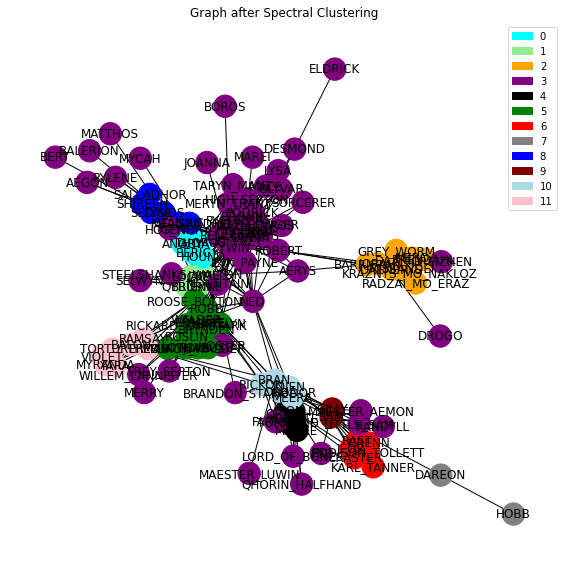

In [ ]:
k = 12
SpecClust = SpectralClustering(G)
SpecClust.fit(k)
clustering_labels = SpecClust.predict_labels()
clustering_labels
for i,node in enumerate(G.nodes()):
    G.nodes[node]['label'] = clustering_labels[i]

colour_map = ['']*len(clustering_labels)
for i, label in enumerate(clustering_labels):
    if label == 0:
        colour_map[i] = 'lightgreen'
    else:
        colour_map[i] = "red"

# nx.draw(CG, with_labels=True, node_color=colour_map)
SpecClust.plot_graph(k, title="Graph after Spectral Clustering")

### Printing the 12 clusters and characters in each of them

In [ ]:
pairs = dict()
for i,node in enumerate(G.nodes()):
    # print(node, clustering_labels[i])
    if(clustering_labels[i] not in pairs.keys()):
        pairs[clustering_labels[i]] = list()
    pairs[clustering_labels[i]].append(node)

final = dict(sorted(pairs.items()))
for key,val in final.items():
    print(key," : ",val)

0  :  ['ARYA', 'HOUND', 'THOROS', 'GENDRY', 'BERIC', 'ANGUY']
1  :  ['BRIENNE', 'JAIME', 'LOCKE', 'QYBURN']
2  :  ['DAENERYS', 'JORAH', 'MISSANDEI', 'BARRISTAN', 'KRAZNYS_MO_NAKLOZ', 'DAARIO', 'RADZAI_MO_ERAZ', 'MERO', 'PRENDAHL', 'GREY_WORM']
3  :  ['TYRION', 'TYWIN', 'CERSEI', 'SANSA', 'SHAE', 'BRONN', 'JOFFREY', 'MARGAERY', 'OLENNA', 'VARYS', 'LITTLEFINGER', 'PODRICK', 'LORAS', 'ROS', 'HOT_PIE', 'STEELSHANKS_WALTON', 'OLYVAR', 'MERYN_TRANT', 'MAESTER_AEMON', 'LITTLE_SAM', 'PYCELLE', 'FARMER', 'TARYN_MANT', 'HOSTER', 'RENLY', 'MACE', 'NED', 'ROBERT', 'PYP', 'WILLEM_LANNISTER', 'RANDYLL', 'FREY_SEPTON', 'GREIZHEN', 'LORD_OF_BONES', 'MAREI', 'SORCERER', 'AERYS', 'MOUNTAIN', 'BRANDON_STARK', 'SELWYN', 'HIGH_SEPTON', 'JOANNA', 'MERRY', 'AEGON', 'ILYN_PAYNE', 'MYCAH', 'BALERION', 'BERT', 'BOROS', 'MAESTER_LUWIN', 'DROGO', 'MATTHOS', 'RYLENE', 'DESMOND', 'ELDRICK', 'QHORIN_HALFHAND', 'LYSA']
4  :  ['JON', 'YGRITTE', 'ORELL', 'MANCE', 'TORMUND']
5  :  ['ROBB', 'TALISA', 'CATELYN', 'EDMURE',

0. 'ARYA' and 'GENDRY' travel together to Riverrun. They watch trial between 'BERIC' and 'HOUND'. Beric, the loser is resurrected by 'THOROS'. 'ANGUY' is among the company of Thoros 

1. 'BRIENNE' is knighted by 'JAIME'. These two then engage in sword fight in S3. They then meet 'LOCKE', riders from House Bolton, and him abd Brienne are taken as prisoners. Jaime is treated by 'QYBURN'. 

2. Daenerys begins her rise to conquer a city. Buys an army of 8000 soldiers. Missandei is a translator.(First appearance in GOT)
Barristan Selmy and Jorah advise Daenerys to not trade her dragons. Daenerys sends Jorah, Daario and Grey Worm to infiltrate Yunkai and open the city gate for her army. Kraznys is the person who trades the Unsullied army with Daenerys for a dragon.(Later Kraznys is killed by her dragon.) Grey worm is chosen as leader of army. Razdal mo Eraz is sent by the Wise Masters to negotiate with Daenerys when she sets camp outside of Yunkai and sends word demanding the surrender of the city
Daario Naharis, Prendahl meets Daenerys in her tent outside Yunkai

3. TYWIN is father of TYRION, CERSEI and JAIME. SANSA is eldest daughter of Eddard Stark of Winterfell and wife of TYWIN. SHAE was a prostitute who had begun an exclusive relationship with TYRION. BRONN comes to prominence when he champions for TYRION in his trial by combat in the Eyrie. TYWIN arranges a marriage alliance between LYSA and LITTLEFINGER to fight the rest of her family. MARGAERY Tyrell became Queen Consort through her marriage to JOFFREY. MARGAERY is granddaughter of OLENNA. ELDRICK and DESMOND make fun of TYRION as him and SANSA are walking past them through red keep garden. VARYS eunuch and was the Master of Whisperers on the King's Small Council. LITTLEFINGER  is master of Coin on the Small Council under King Robert Baratheon and King Joffrey Baratheon. PODRICK is Tyrion Lannister's squire.

4. 'YGRITTE', 'ORELL', 'MANCE', 'TORMUND' are the Free Folks (wildings), who live beyond the Wall. Jon meets the Free Folks in S2, and ends up staying and travelling with them throughout the season 3. This justifies them being in the same cluster

5. 'ROBB' and 'TALISA' are husband and wife. 'CATELYN' is Robb's mother. 'EDMURE', Catelyn's younger brother, is first mentioned in a converstaion between Robb and 'RICKARD_KARSTARK'. 'BRYNDEN' is Catelyn's uncle. 'ROSLIN', the daughter of 'WALDER', the lord of Frey clan was supposed to marry Robb. But, as Robb fell in love with Talisa, him and his family decide to get Edmure married to her instead. 'LOTHAR' and 'BLACK_WALDER' are the sons of Lord Walder. During the "Red wedding", Robb, Talisa and Catelyn are poisoned by Walder and 'ROOSE_BOLTON'.

6. 'JEOR', 'RAST', 'CRASTER', 'GRENN', 'KARL_TANNER', 'EDDISON_TOLLETT' belong to Night's Watch. 

8. 'STANNIS' is the Lord of Dragonstone. After his defeat, he only allows 'MELISANDRE' to see him. He knights 'DAVOS', who saves his life. 'SELYSE' is the wife of Stannis. In their loveless marraige, they have a single daughter, 'SHIREEN'. 

9. 'GILLY' is one of the Free Folk, and is a daughter and wife of Craster. 'SAM' and GILLY are lovers.

10. BRAN, OSHA, JOJEN, HODOR, MEERA, RICKON travel beyond the Wall to find the Three-Eyed Raven, believing BRAN to be instrumental in the oncoming war against the White Walkers.

11. 'RAMSAY was sent to secure Winterfell and bring back 'THEON' alive. 'MYRANDA' and 'VIOLET' are the two women who release Theon and fondle him. Torturer is the guy who had caught Theon and was about to assault Theon but was released by Ramsay. 'YARA' is sister of Theon and 'BALON' is father of Theon. These are the 6 characters that are involved in the sequence of events where Ramsay fakes rescuing Theon and uses him against Greyjoy family

# Link Prediction - Traditional Method

* Number of nodes and edges before removing a random sample of nodes

In [ ]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes =", str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G)))

Number of nodes = 124
Number of edges = 504
Number of connected components = 1


### Removing a random sample of edges and seeing how accurately we can predict their existence using traditional ML techniques

In [ ]:
# take a random sample of edges

proportion_edges = 0.25
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# remove some edges. the goal is to try and repredict these edges, and measure how close the prediction is to the original.

G_train = G.copy()
G_train.remove_edges_from(edge_subset)

* plot of graph after removing a random sample of edges

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


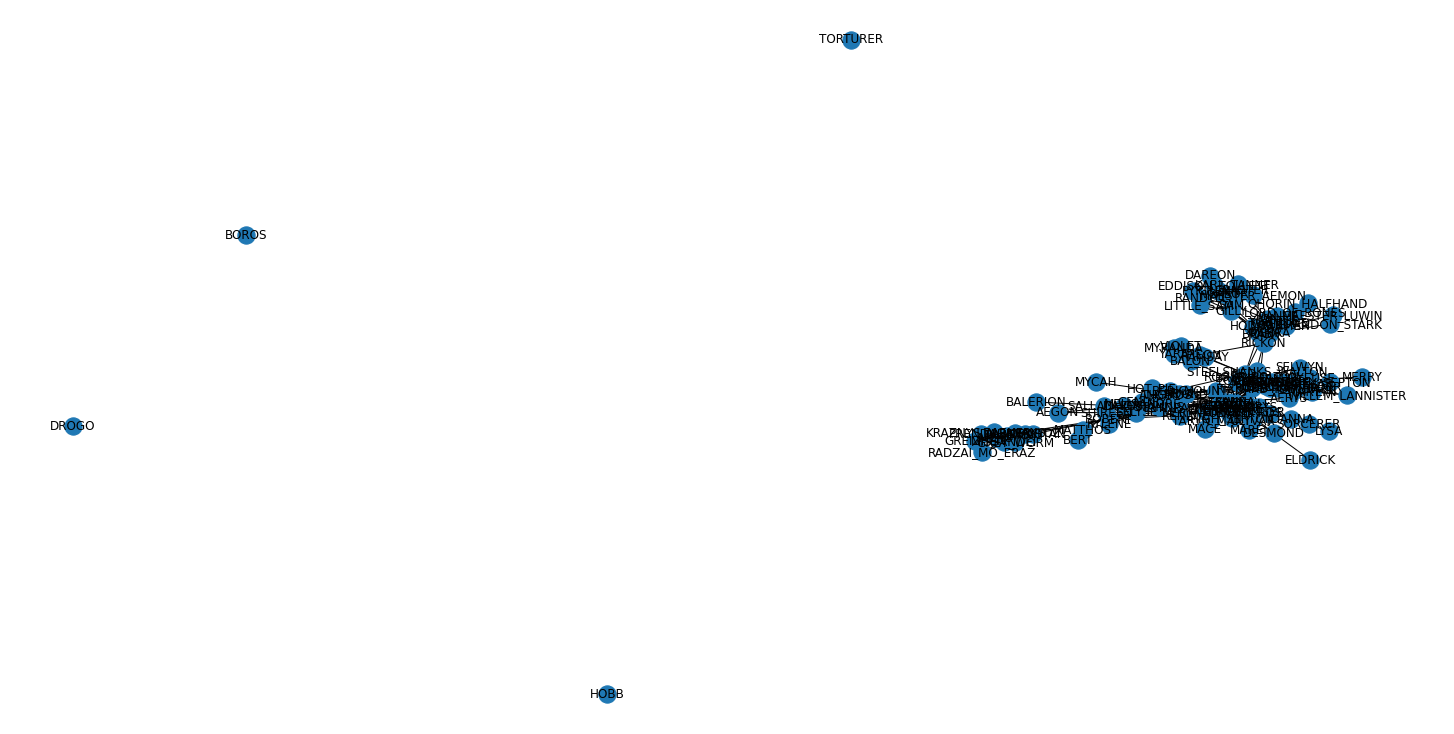

In [ ]:
plt.figure(figsize=(20, 10))
nx.draw(G_train, with_labels = True)

* Number of nodes and edges after removing a random sample of edges

In [ ]:
n = G_train.number_of_nodes()
m = G_train.number_of_edges()
print("Number of nodes =", str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G_train)))

Number of nodes = 124
Number of edges = 378
Number of connected components = 5


### Prediction using Jaccard Coefficient

In [ ]:


prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [ ]:


fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

### Prediction using Adamic-Adar

In [ ]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [ ]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

### Prediction using Preferential Attachment

In [ ]:
prediction_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [ ]:
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

### Plotting ROC-AUC curve for various techniques.

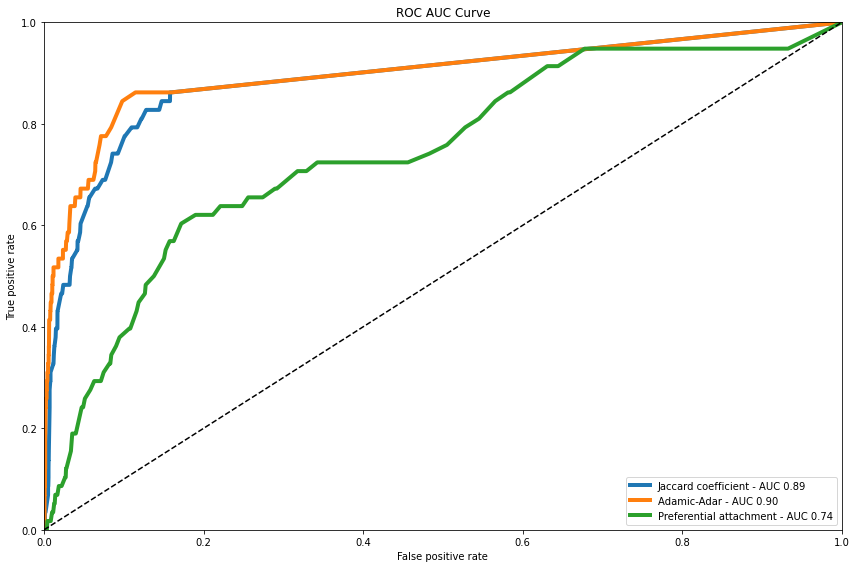

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

### Comparison of Traditional models + Optimal Threshold Value

* It is clear from the auc, that **Adamic Adar** performs the best.
* Finding the threshold value at which adamic adar performs the best

In [ ]:
optimal_idx = np.argmax(tpr_adamic - fpr_adamic)
optimal_threshold = thresholds_adamic[optimal_idx]
print("Optimal threshold =", optimal_threshold)

# this is the threshold value above which a link will be classified as existant, and below which a link will be classified as non-existant.

Optimal threshold = 0.40242960438184466


# Link Prediction - Machine Learning Methods

## Preprocessing

### Installing packages

In [ ]:

import os
import torch


os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.11.0+cu113


### Importing libraries

In [ ]:
import os.path as osp

import torch
from sklearn.metrics import roc_auc_score

import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling
from torch_geometric.transforms import RandomLinkSplit

import pandas as pd
import networkx as nx
import numpy as np
from sklearn.preprocessing import StandardScaler

import torch
import pandas as pd
from torch_geometric.data import InMemoryDataset, Data
from sklearn.model_selection import train_test_split
import torch_geometric.transforms as T

from torch_geometric.utils import convert
from torch_geometric.nn import SAGEConv

### Building networkX graph

In [ ]:
G_edge = nx.Graph()
# Iterating through the DataFrame to add edges
for _, edge in season3.iterrows():
    G_edge.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])

pyg = convert.from_networkx(G_edge)

### Defining embeddings

In [ ]:
embeddings = np.array(list(dict(G_edge.degree()).values()))



### Normalizing degree values

In [ ]:

scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))
pyg.x = torch.from_numpy(embeddings).type(torch.float32)

### Splitting data into test, train and validation sets

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
    T.NormalizeFeatures(),
    T.ToDevice(device),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True,
                      add_negative_train_samples=False),
])

dataset = pyg

transform = RandomLinkSplit(is_undirected=True)
train_data, val_data, test_data = transform(dataset)

## GCN

### Class to define GCN convolution layer

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()




### Initialising the model

In [ ]:
model = Net(dataset.num_features, 128, 64).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

test_array_gcn=[]


### Train() and Test()

In [ ]:
def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = model.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss


@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())




### Running model

In [ ]:
best_val_auc = final_test_auc = 0
for epoch in range(1, 251):
    loss = train()
    val_auc = test(val_data)
    test_auc = test(test_data)
    test_array_gcn.append(test_auc)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test: {final_test_auc:.4f}')

z = model.encode(test_data.x, test_data.edge_index)
final_edge_index = model.decode_all(z)

Epoch: 001, Loss: 0.6993, Val: 0.7264, Test: 0.7808
Epoch: 002, Loss: 0.6843, Val: 0.7280, Test: 0.7759
Epoch: 003, Loss: 0.6727, Val: 0.7300, Test: 0.7677
Epoch: 004, Loss: 0.6713, Val: 0.7332, Test: 0.7525
Epoch: 005, Loss: 0.6719, Val: 0.7340, Test: 0.7551
Epoch: 006, Loss: 0.6682, Val: 0.7332, Test: 0.7677
Epoch: 007, Loss: 0.6576, Val: 0.7316, Test: 0.7690
Epoch: 008, Loss: 0.6587, Val: 0.7328, Test: 0.7659
Epoch: 009, Loss: 0.6552, Val: 0.7312, Test: 0.7576
Epoch: 010, Loss: 0.6539, Val: 0.7312, Test: 0.7654
Epoch: 011, Loss: 0.6491, Val: 0.7320, Test: 0.7741
Epoch: 012, Loss: 0.6498, Val: 0.7320, Test: 0.7750
Epoch: 013, Loss: 0.6572, Val: 0.7196, Test: 0.7604
Epoch: 014, Loss: 0.6461, Val: 0.7124, Test: 0.7425
Epoch: 015, Loss: 0.6501, Val: 0.7108, Test: 0.7459
Epoch: 016, Loss: 0.6475, Val: 0.7136, Test: 0.7598
Epoch: 017, Loss: 0.6395, Val: 0.7220, Test: 0.7732
Epoch: 018, Loss: 0.6498, Val: 0.7112, Test: 0.7557
Epoch: 019, Loss: 0.6541, Val: 0.6940, Test: 0.7252
Epoch: 020, 

## Graph Sage

### GraphSage class to define convolution layer

In [ ]:
# After applying the `RandomLinkSplit` transform, the data is transformed from
# a data object to a list of tuples (train_data, val_data, test_data), with
# each element representing the corresponding split.


class GraphSageNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()




### Initialising the model

In [ ]:
model = GraphSageNet(dataset.num_features, 256, 64).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.005)
criterion = torch.nn.BCEWithLogitsLoss()
test_array_gs=[]





### Train() and Test()

In [ ]:

def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = model.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss


@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

### Run the model and view results

In [ ]:
best_val_auc = final_test_auc = 0
for epoch in range(1, 251):
    loss = train()
    val_auc = test(val_data)
    test_auc = test(test_data)
    test_array_gs.append(test_auc)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test: {final_test_auc:.4f}')

z = model.encode(test_data.x, test_data.edge_index)
final_edge_index = model.decode_all(z)

Epoch: 001, Loss: 7.9700, Val: 0.4898, Test: 0.5251
Epoch: 002, Loss: 26.9886, Val: 0.7034, Test: 0.7343
Epoch: 003, Loss: 7.1153, Val: 0.6832, Test: 0.7023
Epoch: 004, Loss: 6.7382, Val: 0.6174, Test: 0.6473
Epoch: 005, Loss: 13.1757, Val: 0.6702, Test: 0.7017
Epoch: 006, Loss: 10.5457, Val: 0.7146, Test: 0.7514
Epoch: 007, Loss: 3.7823, Val: 0.7376, Test: 0.7723
Epoch: 008, Loss: 2.3505, Val: 0.7346, Test: 0.7730
Epoch: 009, Loss: 4.8754, Val: 0.7078, Test: 0.7580
Epoch: 010, Loss: 7.1744, Val: 0.7176, Test: 0.7453
Epoch: 011, Loss: 5.5450, Val: 0.7044, Test: 0.7257
Epoch: 012, Loss: 2.6624, Val: 0.6924, Test: 0.7160
Epoch: 013, Loss: 1.6819, Val: 0.7016, Test: 0.7219
Epoch: 014, Loss: 2.2366, Val: 0.7134, Test: 0.7349
Epoch: 015, Loss: 3.4055, Val: 0.7208, Test: 0.7437
Epoch: 016, Loss: 3.7781, Val: 0.7352, Test: 0.7489
Epoch: 017, Loss: 2.6454, Val: 0.7264, Test: 0.7520
Epoch: 018, Loss: 1.5596, Val: 0.7160, Test: 0.7424
Epoch: 019, Loss: 1.2325, Val: 0.7088, Test: 0.7353
Epoch: 02

## GAT

### Class for GAT convolution layer

In [ ]:
import os.path as osp

import torch
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GATConv

class Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GATConv(-1, 8, heads=8, dropout=0.1)
        # On the Pubmed dataset, use heads=8 in conv2.
        self.conv2 = GATConv(8 * 8, 6, heads=6, concat=False,
                             dropout=0.8)


    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()







### Initialising the model

In [ ]:
model = Net(dataset.num_features, 256, 64).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.009)
criterion = torch.nn.BCEWithLogitsLoss()
test_array_gat=[]

### Train() and Test()

In [ ]:


def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = model.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss


@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

### Run the model and view results

In [ ]:
best_val_auc = final_test_auc = 0
for epoch in range(1, 251):
    loss = train()
    val_auc = test(val_data)
    test_auc = test(test_data)
    test_array_gat.append(test_auc)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test: {final_test_auc:.4f}')

z = model.encode(test_data.x, test_data.edge_index)
final_edge_index = model.decode_all(z)

Epoch: 001, Loss: 0.6936, Val: 0.7180, Test: 0.7309
Epoch: 002, Loss: 0.6937, Val: 0.7116, Test: 0.7388
Epoch: 003, Loss: 0.6932, Val: 0.7176, Test: 0.7453
Epoch: 004, Loss: 0.6923, Val: 0.7196, Test: 0.7495
Epoch: 005, Loss: 0.6917, Val: 0.7224, Test: 0.7522
Epoch: 006, Loss: 0.6899, Val: 0.7244, Test: 0.7516
Epoch: 007, Loss: 0.6899, Val: 0.7232, Test: 0.7535
Epoch: 008, Loss: 0.6895, Val: 0.7240, Test: 0.7521
Epoch: 009, Loss: 0.6884, Val: 0.7352, Test: 0.7407
Epoch: 010, Loss: 0.6793, Val: 0.7364, Test: 0.7383
Epoch: 011, Loss: 0.6825, Val: 0.7380, Test: 0.7386
Epoch: 012, Loss: 0.6831, Val: 0.7380, Test: 0.7394
Epoch: 013, Loss: 0.6922, Val: 0.7456, Test: 0.7427
Epoch: 014, Loss: 0.6784, Val: 0.7480, Test: 0.7453
Epoch: 015, Loss: 0.6677, Val: 0.7536, Test: 0.7483
Epoch: 016, Loss: 0.6755, Val: 0.7540, Test: 0.7502
Epoch: 017, Loss: 0.6946, Val: 0.7520, Test: 0.7525
Epoch: 018, Loss: 0.6670, Val: 0.7524, Test: 0.7525
Epoch: 019, Loss: 0.6813, Val: 0.7500, Test: 0.7453
Epoch: 020, 

## Comparison of ML models

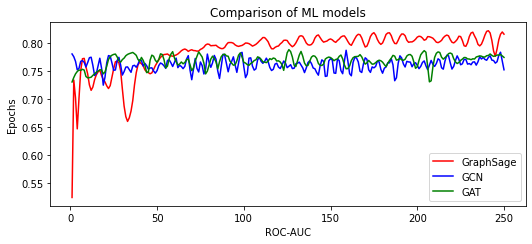

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

t = np.arange(1,251)
a = np.array(test_array_gs)
b = np.array(test_array_gcn)
c = np.array(test_array_gat)

plt.plot(t, a, 'r', label="GraphSage") 

plt.plot(t, b, 'b', label="GCN") 
plt.plot(t, c, 'g', label = "GAT") 

plt.title("Comparison of ML models")
plt.xlabel("ROC-AUC")
plt.ylabel("Epochs")

plt.legend()
plt.show()

# Comparison of Traditional Method and Graph based Method

##### For the comparison, we require a common metric.
Here we are using ROC AUC for comparing results of traditional as well as ML methods - GCN, GraphSAGE & GAT.


### Traditional Methods - Jaccard Coefficient, Adamic Adar, Preferential Attachment

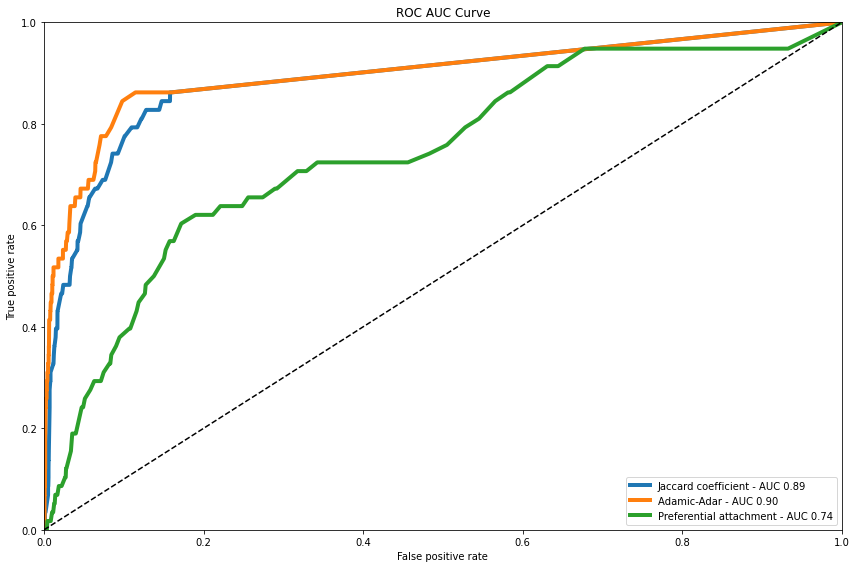

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

### ML methods - GCN, GraphSAGE & GAT.

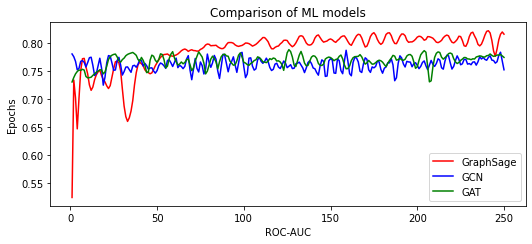

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

t = np.arange(1,251)
a = np.array(test_array_gs)
b = np.array(test_array_gcn)
c = np.array(test_array_gat)

plt.plot(t, a, 'r', label="GraphSage") 

plt.plot(t, b, 'b', label="GCN") 
plt.plot(t, c, 'g', label = "GAT") 

plt.title("Comparison of ML models")
plt.xlabel("ROC-AUC")
plt.ylabel("Epochs")

plt.legend()
plt.show()

### Conclusion

It is observed that the Traditional methods perform better when compared with the Machine Learning models.

The best performing Traditional Model - Adamic Adar || AUC --> 0.90

The best performing ML Model - GraphSAGE || AUC --> 0.81

Reasons :


1.   Since the graph is sparse, the number of links being fewer results in lesser training data for the neural models.

2.   As the nodes had no explicit features, we had to manually generate a unique encoding mapping the nodes to numbers. This reduced feature set further hindered the training of the models.

3.  The sampling of the test set from the entire set of nodes is done randomly, this could result in 'important' nodes being removed from training data, hence having major implications in the link prediction scores.